In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv(r'C:\Users\Nutzer\OneDrive\Desktop\viabill\customers.csv')

In [3]:
customers

,customerID,sex,age,residentialAddress,postalAddress,income
0,1,1,25,28 Irvine Place,28 Irvine Place,NaN
1,2,1,19,72 Bertha Street,72 Bertha Street,43200.0
2,3,2,22,63 Ladberry Street,63 Ladberry Street,70200.0
3,4,0,24,98 Linneman Close,98 Linneman Close,93900.0
4,5,1,53,56 Salonica Road,56 Salonica Road,77000.0
...,...,...,...,...,...,...
499995,499996,1,68,95 Argyle Parade,95 Argyle Parade,40500.0
499996,499997,2,22,34 Bearke Place,34 Bearke Place,44900.0
499997,499998,1,27,95 Glenhurst Street,95 Glenhurst Street,48700.0
499998,499999,1,55,34 Kiandra Close,34 Kiandra Close,7600.0


In [4]:
transactions = pd.read_csv(r'C:\Users\Nutzer\OneDrive\Desktop\viabill\transactions.csv')

In [5]:
transactions

,transactionID,shopID,customerID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4
0,1,114,2869.0,140,0,0,0,0
1,2,855,124077.0,70,0,0,0,0
2,3,752,86184.0,85,0,0,0,0
3,4,246,248861.0,43,1,0,0,0
4,5,973,162112.0,127,0,0,0,0
...,...,...,...,...,...,...,...,...
1999995,1999996,758,333312.0,12,0,0,1,1
1999996,1999997,932,31802.0,145,0,2,2,2
1999997,1999998,932,449391.0,19,0,0,0,0
1999998,1999999,878,433902.0,198,0,1,0,0


# Select transactions that you use as credit applications

In [6]:


credit_applications = transactions.groupby(['customerID'], as_index=False).agg({'transactionID':'max'})


credit_applications

,customerID,transactionID
0,1.0,1697842
1,2.0,1834257
2,3.0,1974624
3,4.0,1536291
4,5.0,661121
...,...,...
490528,499996.0,665043
490529,499997.0,1756533
490530,499998.0,1628579
490531,499999.0,1722718


In [7]:
transactions.columns

Index(['transactionID', 'shopID', 'customerID', 'price', 'paytmentStatus1',
       'paytmentStatus2', 'paytmentStatus3', 'paytmentStatus4'],
      dtype='object')

In [8]:
new_trans = credit_applications.merge(transactions[['transactionID','price', 'paytmentStatus1',
       'paytmentStatus2', 'paytmentStatus3', 'paytmentStatus4']], on='transactionID', how='left')

In [9]:
new_trans

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4
0,1.0,1697842,147,0,0,0,0
1,2.0,1834257,150,0,0,0,0
2,3.0,1974624,140,0,0,0,0
3,4.0,1536291,136,0,1,0,0
4,5.0,661121,181,0,0,0,0
...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0
490529,499997.0,1756533,127,0,0,1,0
490530,499998.0,1628579,157,0,0,0,0
490531,499999.0,1722718,171,0,0,0,0


# join result from previous point with customer Income - if Income is Missing replace it with -999 value

In [10]:
# Join transactions df with customers df on customerID
df = pd.merge(new_trans, customers, on='customerID', how='left')

# Replace missing Income values with 999
df['income'] = df['income'].fillna(999)

# create “trans_price_avg_lst3”

In [11]:
df['trans_price_avg_lst3'] = df.groupby('customerID')['price'].rolling(3, min_periods=1).mean().reset_index(0, drop=True)
df

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4,sex,age,residentialAddress,postalAddress,income,trans_price_avg_lst3
0,1.0,1697842,147,0,0,0,0,1,25,28 Irvine Place,28 Irvine Place,999.0,147.0
1,2.0,1834257,150,0,0,0,0,1,19,72 Bertha Street,72 Bertha Street,43200.0,150.0
2,3.0,1974624,140,0,0,0,0,2,22,63 Ladberry Street,63 Ladberry Street,70200.0,140.0
3,4.0,1536291,136,0,1,0,0,0,24,98 Linneman Close,98 Linneman Close,93900.0,136.0
4,5.0,661121,181,0,0,0,0,1,53,56 Salonica Road,56 Salonica Road,77000.0,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0,1,68,95 Argyle Parade,95 Argyle Parade,40500.0,27.0
490529,499997.0,1756533,127,0,0,1,0,2,22,34 Bearke Place,34 Bearke Place,44900.0,127.0
490530,499998.0,1628579,157,0,0,0,0,1,27,95 Glenhurst Street,95 Glenhurst Street,48700.0,157.0
490531,499999.0,1722718,171,0,0,0,0,1,55,34 Kiandra Close,34 Kiandra Close,7600.0,171.0


In [12]:
df.columns

Index(['customerID', 'transactionID', 'price', 'paytmentStatus1',
       'paytmentStatus2', 'paytmentStatus3', 'paytmentStatus4', 'sex', 'age',
       'residentialAddress', 'postalAddress', 'income',
       'trans_price_avg_lst3'],
      dtype='object')

In [13]:
df.drop(columns=['residentialAddress', 'postalAddress'], axis=1, inplace=True)

In [14]:
df

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4,sex,age,income,trans_price_avg_lst3
0,1.0,1697842,147,0,0,0,0,1,25,999.0,147.0
1,2.0,1834257,150,0,0,0,0,1,19,43200.0,150.0
2,3.0,1974624,140,0,0,0,0,2,22,70200.0,140.0
3,4.0,1536291,136,0,1,0,0,0,24,93900.0,136.0
4,5.0,661121,181,0,0,0,0,1,53,77000.0,181.0
...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0,1,68,40500.0,27.0
490529,499997.0,1756533,127,0,0,1,0,2,22,44900.0,127.0
490530,499998.0,1628579,157,0,0,0,0,1,27,48700.0,157.0
490531,499999.0,1722718,171,0,0,0,0,1,55,7600.0,171.0


In [15]:
df['combined'] = df['paytmentStatus1'].astype(str) + df['paytmentStatus2'].astype(str) + df['paytmentStatus3'].astype(str) + df['paytmentStatus4'].astype(str)

df

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4,sex,age,income,trans_price_avg_lst3,combined
0,1.0,1697842,147,0,0,0,0,1,25,999.0,147.0,0000
1,2.0,1834257,150,0,0,0,0,1,19,43200.0,150.0,0000
2,3.0,1974624,140,0,0,0,0,2,22,70200.0,140.0,0000
3,4.0,1536291,136,0,1,0,0,0,24,93900.0,136.0,0100
4,5.0,661121,181,0,0,0,0,1,53,77000.0,181.0,0000
...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0,1,68,40500.0,27.0,0000
490529,499997.0,1756533,127,0,0,1,0,2,22,44900.0,127.0,0010
490530,499998.0,1628579,157,0,0,0,0,1,27,48700.0,157.0,0000
490531,499999.0,1722718,171,0,0,0,0,1,55,7600.0,171.0,0000


In [16]:
# Define function to check for default
def check_default(combined):
    if '2' in combined:
        return 2
    else:
        return 0
# Apply function to create default column
df['default'] = df['combined'].apply(check_default)

df

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4,sex,age,income,trans_price_avg_lst3,combined,default
0,1.0,1697842,147,0,0,0,0,1,25,999.0,147.0,0000,0
1,2.0,1834257,150,0,0,0,0,1,19,43200.0,150.0,0000,0
2,3.0,1974624,140,0,0,0,0,2,22,70200.0,140.0,0000,0
3,4.0,1536291,136,0,1,0,0,0,24,93900.0,136.0,0100,0
4,5.0,661121,181,0,0,0,0,1,53,77000.0,181.0,0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0,1,68,40500.0,27.0,0000,0
490529,499997.0,1756533,127,0,0,1,0,2,22,44900.0,127.0,0010,0
490530,499998.0,1628579,157,0,0,0,0,1,27,48700.0,157.0,0000,0
490531,499999.0,1722718,171,0,0,0,0,1,55,7600.0,171.0,0000,0


In [17]:
df.default.value_counts()

0    445408
2     45125
Name: default, dtype: int64

In [18]:
df['default'] = np.where(df['default']==2,1,df['default'])

In [19]:
df.default.value_counts()

0    445408
1     45125
Name: default, dtype: int64

In [20]:
df

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4,sex,age,income,trans_price_avg_lst3,combined,default
0,1.0,1697842,147,0,0,0,0,1,25,999.0,147.0,0000,0
1,2.0,1834257,150,0,0,0,0,1,19,43200.0,150.0,0000,0
2,3.0,1974624,140,0,0,0,0,2,22,70200.0,140.0,0000,0
3,4.0,1536291,136,0,1,0,0,0,24,93900.0,136.0,0100,0
4,5.0,661121,181,0,0,0,0,1,53,77000.0,181.0,0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0,1,68,40500.0,27.0,0000,0
490529,499997.0,1756533,127,0,0,1,0,2,22,44900.0,127.0,0010,0
490530,499998.0,1628579,157,0,0,0,0,1,27,48700.0,157.0,0000,0
490531,499999.0,1722718,171,0,0,0,0,1,55,7600.0,171.0,0000,0


In [21]:
df.drop(columns=['paytmentStatus1','paytmentStatus2', 'paytmentStatus3', 'paytmentStatus4','combined'],axis=1,inplace=True)

In [22]:
df

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,default
0,1.0,1697842,147,1,25,999.0,147.0,0
1,2.0,1834257,150,1,19,43200.0,150.0,0
2,3.0,1974624,140,2,22,70200.0,140.0,0
3,4.0,1536291,136,0,24,93900.0,136.0,0
4,5.0,661121,181,1,53,77000.0,181.0,0
...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,1,68,40500.0,27.0,0
490529,499997.0,1756533,127,2,22,44900.0,127.0,0
490530,499998.0,1628579,157,1,27,48700.0,157.0,0
490531,499999.0,1722718,171,1,55,7600.0,171.0,0


In [23]:
df.dtypes

customerID              float64
transactionID             int64
price                     int64
sex                       int64
age                       int64
income                  float64
trans_price_avg_lst3    float64
default                   int64
dtype: object

In [24]:
df['customerID'] = df['customerID'].astype(int)

In [25]:
df['customerID'] = df['customerID'].astype(str).str.zfill(7)
df['transactionID'] = df['transactionID'].astype(str)

df

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,default
0,0000001,1697842,147,1,25,999.0,147.0,0
1,0000002,1834257,150,1,19,43200.0,150.0,0
2,0000003,1974624,140,2,22,70200.0,140.0,0
3,0000004,1536291,136,0,24,93900.0,136.0,0
4,0000005,661121,181,1,53,77000.0,181.0,0
...,...,...,...,...,...,...,...,...
490528,0499996,665043,27,1,68,40500.0,27.0,0
490529,0499997,1756533,127,2,22,44900.0,127.0,0
490530,0499998,1628579,157,1,27,48700.0,157.0,0
490531,0499999,1722718,171,1,55,7600.0,171.0,0


In [26]:
df.dtypes

customerID               object
transactionID            object
price                     int64
sex                       int64
age                       int64
income                  float64
trans_price_avg_lst3    float64
default                   int64
dtype: object

# Check if there is a dependency between age and sex in the data – use statistical test if applicable

In [27]:
# Check if there is a dependency between age and sex in the data

from scipy.stats import pearsonr

corr, p_value = pearsonr(df['sex'], df['age'])
print('correlation coef: ',corr)
print('p value: ', p_value)

#we can conclude that there is a too very weak positive correlation between age and sex
# p value considered to be lower than 0.05, hence this correlation is statistically not significant at the 0.31 level.

correlation coef:  0.001435107992500123
p value:  0.3148391817015066


# propose customers segments that we could use when we want to send emails with offers

In [28]:
df

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,default
0,0000001,1697842,147,1,25,999.0,147.0,0
1,0000002,1834257,150,1,19,43200.0,150.0,0
2,0000003,1974624,140,2,22,70200.0,140.0,0
3,0000004,1536291,136,0,24,93900.0,136.0,0
4,0000005,661121,181,1,53,77000.0,181.0,0
...,...,...,...,...,...,...,...,...
490528,0499996,665043,27,1,68,40500.0,27.0,0
490529,0499997,1756533,127,2,22,44900.0,127.0,0
490530,0499998,1628579,157,1,27,48700.0,157.0,0
490531,0499999,1722718,171,1,55,7600.0,171.0,0


In [29]:
segments = df.groupby('default').mean()

segments

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_12724\2576373423.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segments = df.groupby('default').mean()


,price,sex,age,income,trans_price_avg_lst3
default,,,,,
0,101.579581,1.142449,44.63857,49034.724933,101.579581
1,101.861673,1.228565,44.55282,48886.157363,101.861673


# Perform exploratory data analysis (EDA) and present interesting findings related to credit risk

In [30]:
df

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,default
0,0000001,1697842,147,1,25,999.0,147.0,0
1,0000002,1834257,150,1,19,43200.0,150.0,0
2,0000003,1974624,140,2,22,70200.0,140.0,0
3,0000004,1536291,136,0,24,93900.0,136.0,0
4,0000005,661121,181,1,53,77000.0,181.0,0
...,...,...,...,...,...,...,...,...
490528,0499996,665043,27,1,68,40500.0,27.0,0
490529,0499997,1756533,127,2,22,44900.0,127.0,0
490530,0499998,1628579,157,1,27,48700.0,157.0,0
490531,0499999,1722718,171,1,55,7600.0,171.0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490533 entries, 0 to 490532
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   customerID            490533 non-null  object 
 1   transactionID         490533 non-null  object 
 2   price                 490533 non-null  int64  
 3   sex                   490533 non-null  int64  
 4   age                   490533 non-null  int64  
 5   income                490533 non-null  float64
 6   trans_price_avg_lst3  490533 non-null  float64
 7   default               490533 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 33.7+ MB


In [32]:
df.describe(include='all')

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,default
count,490533,490533,490533.000000,490533.000000,490533.000000,490533.000000,490533.000000,490533.000000
unique,490533,490533,NaN,NaN,NaN,NaN,NaN,NaN
top,0000001,1697842,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,101.605531,1.150371,44.630681,49021.057939,101.605531,0.091992
std,NaN,NaN,57.194611,0.477948,16.176352,29417.177692,57.194611,0.289015
min,NaN,NaN,3.000000,0.000000,5.000000,0.000000,3.000000,0.000000
25%,NaN,NaN,52.000000,1.000000,27.000000,23500.000000,52.000000,0.000000
50%,NaN,NaN,102.000000,1.000000,50.000000,49000.000000,102.000000,0.000000
75%,NaN,NaN,151.000000,1.000000,58.000000,74500.000000,151.000000,0.000000


In [33]:
def missing_values_table(data):
    mis_val=df.isnull().sum()
    mis_val_percent = 100 * mis_val / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
                                                                    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
    return mis_val_table_ren_columns

In [34]:
missing_values_train = missing_values_table(df)
missing_values_train.head()

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [35]:
df.corr()

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_12724\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,sex,age,income,trans_price_avg_lst3,default
price,1.000000,0.000493,0.001014,0.003703,1.000000,0.001425
sex,0.000493,1.000000,0.001435,0.002219,0.000493,0.052074
age,0.001014,0.001435,1.000000,0.001796,0.001014,-0.001532
income,0.003703,0.002219,0.001796,1.000000,0.003703,-0.001460
trans_price_avg_lst3,1.000000,0.000493,0.001014,0.003703,1.000000,0.001425
default,0.001425,0.052074,-0.001532,-0.001460,0.001425,1.000000


In [36]:
df.columns

Index(['customerID', 'transactionID', 'price', 'sex', 'age', 'income',
       'trans_price_avg_lst3', 'default'],
      dtype='object')

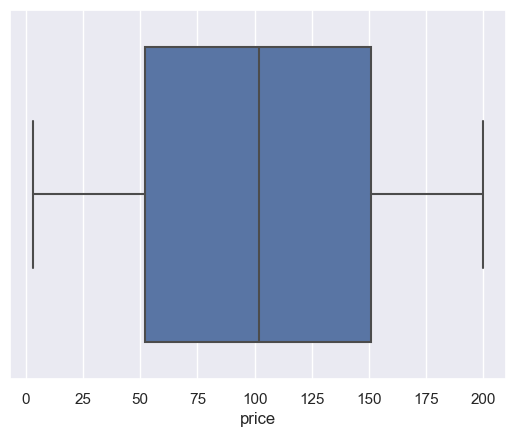

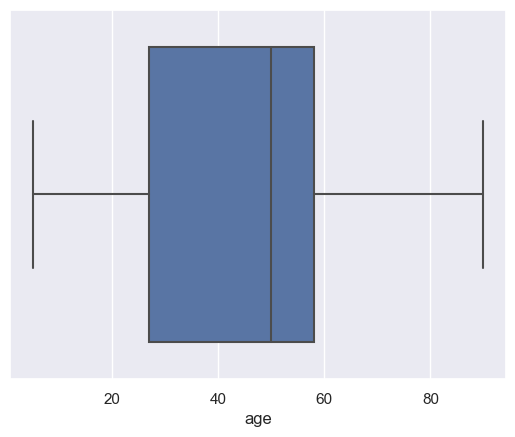

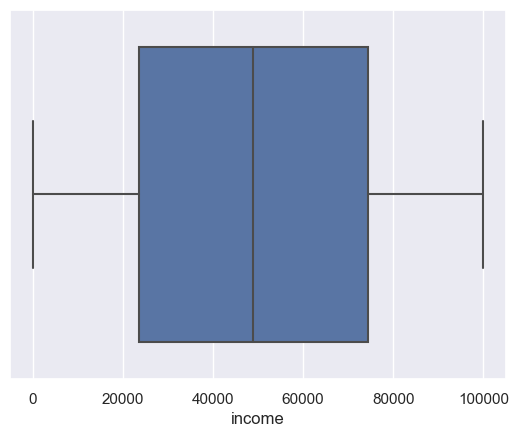

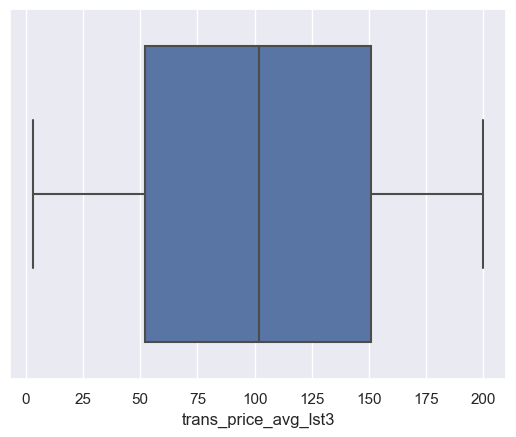

In [37]:
for i in df[['price','age', 'income','trans_price_avg_lst3']]:
    sns.boxplot(data=df,x=df[i])
    plt.show()

In [ ]:
# if there was an outlier in each column i wolud use IQR rules and capping technique

"""
q1 = new_data.quantile(0.25)
q3 = new_data.quantile(0.75)
IQR  = q3 - q1
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR

for i in df[['price','age', 'income','trans_price_avg_lst3']]:
    df[i] = np.where(df[i]>upper[i],upper[i],df[i])
    df[i] = np.where(df[i]<lower[i],lower[i],df[i])
    sns.boxplot(x = df[i], data = df)
    plt.show()
"""

# Build model/models that predict if customer will not pay back the loan. 

In [38]:
X = df[[ 'price', 'sex', 'age', 'income','trans_price_avg_lst3']]
y = df[['default']]

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt

In [42]:
models = [LogisticRegression(),XGBClassifier(),LGBMClassifier(),RandomForestClassifier(), LogisticRegression(class_weight='balanced')]

C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Performance for LogisticRegression()
[[133615      0]
 [ 13545      0]]


C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    133615
           1       0.00      0.00      0.00     13545

    accuracy                           0.91    147160
   macro avg       0.45      0.50      0.48    147160
weighted avg       0.82      0.91      0.86    147160

                                      
AUC Score: 54.50835265540306
Gini prob is 9.016705310806117


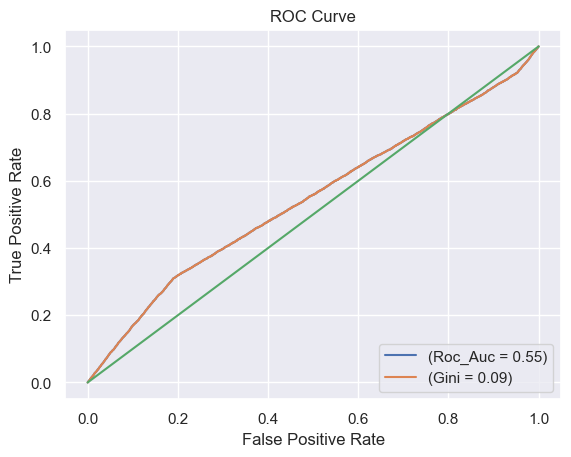

                                      
Model Performance for XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
[[133611      4]
 [ 13543      2]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    133615
           1       0.33      0.00      0.00     13545

    accuracy              

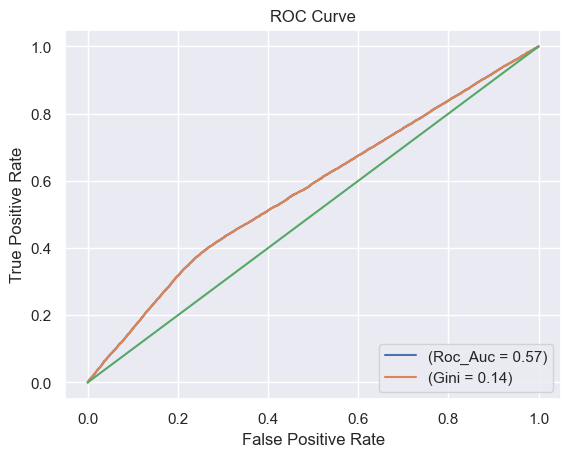

C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Performance for LGBMClassifier()
[[133615      0]
 [ 13545      0]]


C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    133615
           1       0.00      0.00      0.00     13545

    accuracy                           0.91    147160
   macro avg       0.45      0.50      0.48    147160
weighted avg       0.82      0.91      0.86    147160

                                      
AUC Score: 57.73513972220948
Gini prob is 15.470279444418967


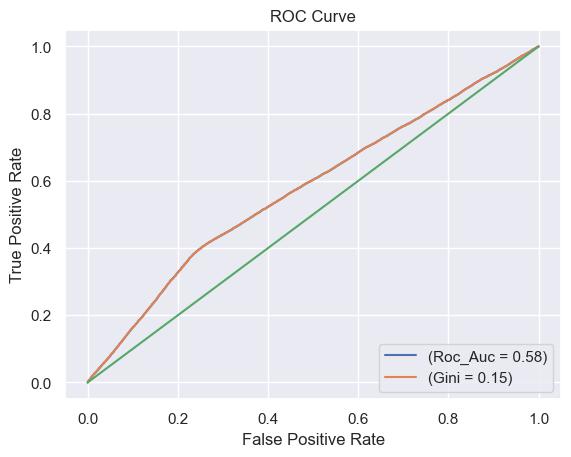

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_12724\464347706.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  models.fit(X_train, y_train)


Model Performance for RandomForestClassifier()
[[131380   2235]
 [ 13320    225]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94    133615
           1       0.09      0.02      0.03     13545

    accuracy                           0.89    147160
   macro avg       0.50      0.50      0.49    147160
weighted avg       0.83      0.89      0.86    147160

                                      
AUC Score: 53.21422697209951
Gini prob is 6.42845394419902


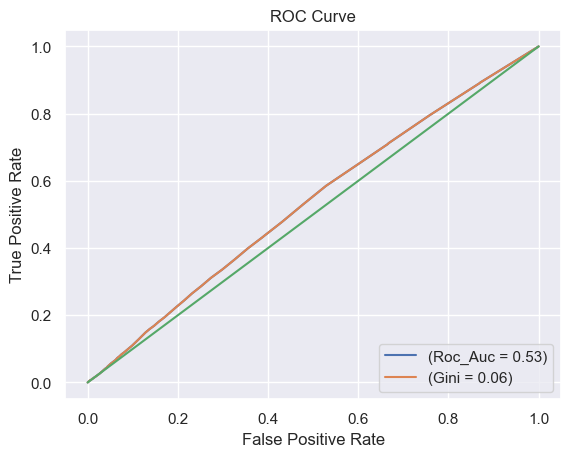

C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Performance for LogisticRegression(class_weight='balanced')
[[108224  25391]
 [  9348   4197]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86    133615
           1       0.14      0.31      0.19     13545

    accuracy                           0.76    147160
   macro avg       0.53      0.56      0.53    147160
weighted avg       0.85      0.76      0.80    147160

                                      
AUC Score: 54.51768852584629
Gini prob is 9.035377051692572


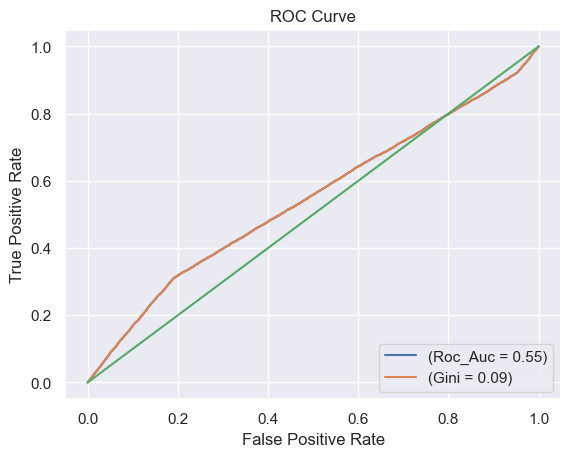

In [43]:
for i in models:
    models=i
    models.fit(X_train, y_train)
    
    y_pred = models.predict(X_test)
    y_prob = models.predict_proba(X_test)[:,1]


    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure()
    
    plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_prob)
    plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini_prob)
    plt.plot([0, 1], [0, 1])
    plt.xlim()
    plt.ylim()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    
    
    print('Model Performance for',i)    
   
    print(confusion_matrix)
    print(classification_report(y_test, y_pred))
    print("                                      ")
    print('AUC Score:', roc_auc_score(y_test, y_prob)*100)
    print('Gini prob is', gini_prob*100)
    plt.show()
    print("="*70)
    print("                                      ")

### XGBClassifier shows better result than others, but model was build with default hyperparameters. Using grid search and cross validation i would like to choose best hyperparameters and increase power of the model

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'feature_fraction': [0.5, 0.7, 0.9],
    'max_depth': [-1, 5, 10]
}

clf = LGBMClassifier(boosting_type='gbdt', objective='binary', metric='auc')
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


GridSearchCV(cv=5, estimator=LGBMClassifier(metric='auc', objective='binary'),
             n_jobs=-1,
             param_grid={'feature_fraction': [0.5, 0.7, 0.9],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [-1, 5, 10], 'num_leaves': [15, 31, 63]})

In [46]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'feature_fraction': 0.5, 'learning_rate': 0.01, 'max_depth': -1, 'num_leaves': 15}
Best score:  0.9080300431262589


In [47]:
best_params = grid_search.best_params_
clf = LGBMClassifier(boosting_type='gbdt', objective='binary', metric='binary_logloss', **best_params)
clf.fit(X_train, y_train)

C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(feature_fraction=0.5, learning_rate=0.01,
               metric='binary_logloss', num_leaves=15, objective='binary')

In [48]:
y_prob = clf.predict_proba(X_test)[:,1]


roc_prob = roc_auc_score(y_test, y_prob)
    
gini_prob = roc_prob*2-1

gini_prob

0.15013025680923464

# Deployment

### Lets imagine our choosen model is accepted and we have to deploy model on new customers

In [49]:
X.columns

Index(['price', 'sex', 'age', 'income', 'trans_price_avg_lst3'], dtype='object')

In [50]:
data = {
        'price': [250,320,140,180,300,500,800,600,350,100],
       'sex': [0,1,2,0,1,1,2,0,1,2],
        'age': [25,30, 32, 35,28,26,45,38,29,50],
       'income': [999.0,45.800, 24.300,76.500,999.0,100.500,247.800,34.500,65.900,57.800],
        'trans_price_avg_lst3':[170,200,340,125,90,150,420,230,145,650]}
 
# Create DataFrame
new_df = pd.DataFrame(data)
new_df

,price,sex,age,income,trans_price_avg_lst3
0,250,0,25,999.0,170
1,320,1,30,45.8,200
2,140,2,32,24.3,340
3,180,0,35,76.5,125
4,300,1,28,999.0,90
5,500,1,26,100.5,150
6,800,2,45,247.8,420
7,600,0,38,34.5,230
8,350,1,29,65.9,145
9,100,2,50,57.8,650


In [51]:
new_pred=clf.predict_proba(new_df)[:,1]

In [52]:
new_df['Probability_of_default (%)'] = new_pred

new_df

,price,sex,age,income,trans_price_avg_lst3,Probability_of_default (%)
0,250,0,25,999.0,170,0.093373
1,320,1,30,45.8,200,0.125460
2,140,2,32,24.3,340,0.125460
3,180,0,35,76.5,125,0.093373
4,300,1,28,999.0,90,0.125460
5,500,1,26,100.5,150,0.125460
6,800,2,45,247.8,420,0.125460
7,600,0,38,34.5,230,0.093373
8,350,1,29,65.9,145,0.125460
9,100,2,50,57.8,650,0.125460
